# Function Transformation

- It convert Probability Transformation Function to Normal Distribution to form Bell Curv
- It increase the performation of ML Model
- For Models like Linear Regression, ANN etc we assume that our model is normally distributed if not then we transform data using given functions.

In [3]:
import pandas as pd 
import numpy as np

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv("Dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

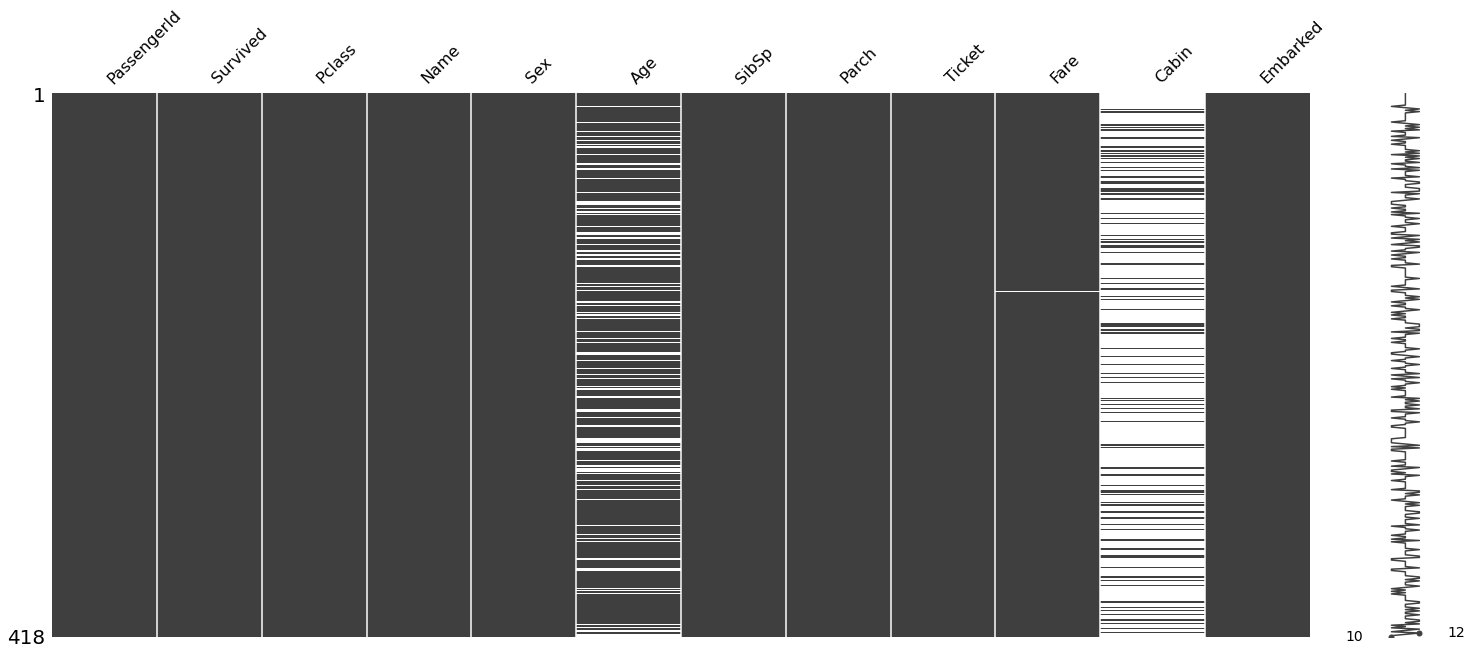

In [8]:
import missingno as mis
mis.matrix(df)

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df_use = df[["Age","Fare","Survived"]]

In [34]:
df_use.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [32]:
# taking mean data for age to fill nan.

df_use["Fare"].fillna( 7.75,inplace = True)

C:\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [35]:
df_use.head()

,Age,Fare,Survived
0,34.5,7.8292,0
1,47.0,7.0000,1
2,62.0,9.6875,0
3,27.0,8.6625,0
4,22.0,12.2875,1


In [60]:
# Forming X and Y dataset
X = df_use.iloc[:,:2]
y = df_use.iloc[:,2]

In [62]:
# Spliting dataset into Train and Test Split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Function Transformation Mathematic Methods
1. Log Transformation
2. Reciporical Method
3. Squar and Square root Method


C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


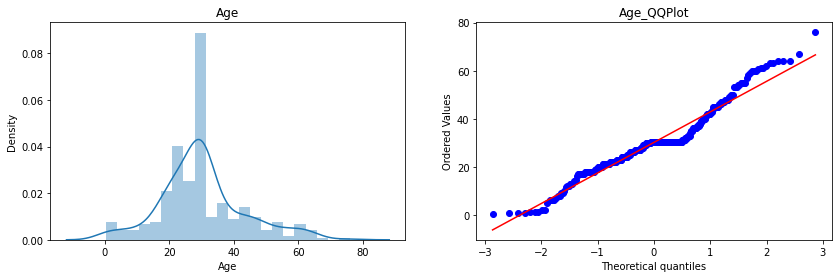

In [48]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("Age")

plt.subplot(122)
stats.probplot(X_train["Age"],dist='norm',plot = plt )
plt.title("Age_QQPlot")

plt.show()

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


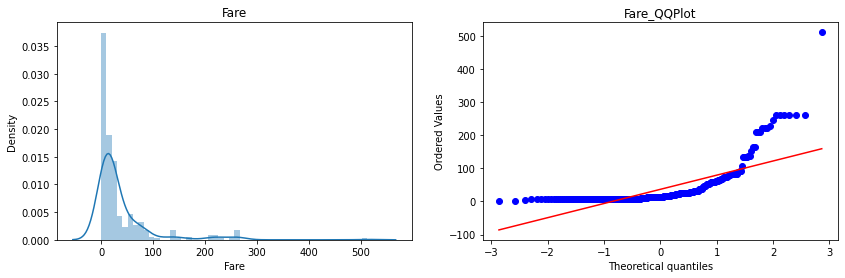

In [49]:
# For Fare
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("Fare")

plt.subplot(122)
stats.probplot(X_train["Fare"],dist='norm',plot = plt )
plt.title("Fare_QQPlot")

plt.show()

In [50]:
df_use.skew()

Age         0.512711
Fare        3.691600
Survived    0.568991
dtype: float64

- Observations:
    1. Fare is Highly Right Skew data

In [66]:
#Applying Model with out using any transformations:

lr = LogisticRegression()
dt = DecisionTreeClassifier() 

In [67]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

lr_acc = accuracy_score(lr.predict(X_test),y_test)
dt_acc = accuracy_score(dt.predict(X_test), y_test)

print("Linear Model Accuracy : ", lr_acc)
print("Decision Tree Accuracy : ", dt_acc)

Linear Model Accuracy :  0.6071428571428571
Decision Tree Accuracy :  0.5833333333333334


### Applying Log Transformation for Right Skew data

In [75]:
trf = FunctionTransformer(func = np.log1p)

In [76]:
#Transforming data sets
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.transform(X_test)

In [77]:
# Re appling model for checking accuracy
lr = LogisticRegression()
dt = DecisionTreeClassifier() 

lr.fit(X_train_trans,y_train)
dt.fit(X_train_trans,y_train)

lr_acc = accuracy_score(lr.predict(X_test_trans),y_test)
dt_acc = accuracy_score(dt.predict(X_test_trans), y_test)

print("Linear Model Accuracy : ", lr_acc)
print("Decision Tree Accuracy : ", dt_acc)

Linear Model Accuracy :  0.6190476190476191
Decision Tree Accuracy :  0.5595238095238095


 - Decision Tree Dosent required Normalisation due to it its accuracy decrese

In [78]:
# Using Cross Validation
X_trans = trf.fit_transform(X)

lr = LogisticRegression()
dt = DecisionTreeClassifier() 

lr_cross_scr = np.mean(cross_val_score(lr,X_trans,y,cv=10, scoring="accuracy"))
dt_cross_scr =np.mean(cross_val_score(dt,X_trans,y,cv=10, scoring="accuracy"))

print("Linear Model Accuracy : ", lr_cross_scr)
print("Decision Tree Accuracy : ", dt_cross_scr)

Linear Model Accuracy :  0.6532520325203252
Decision Tree Accuracy :  0.5980255516840882


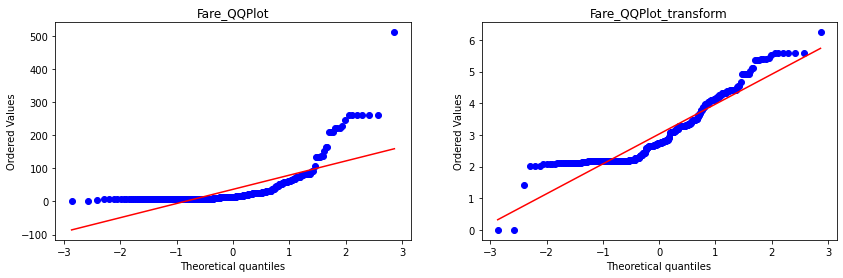

In [79]:
# Plotting dataset Before and After Transform

plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train["Fare"],dist='norm',plot = plt )
plt.title("Fare_QQPlot")

plt.subplot(122)
stats.probplot(X_train_trans["Fare"],dist='norm',plot = plt )
plt.title("Fare_QQPlot_transform")

plt.show()

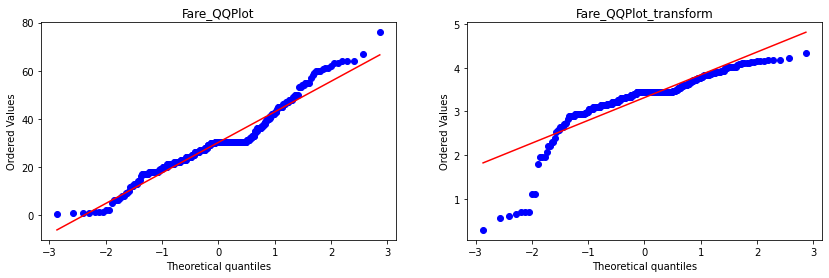

In [80]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train["Age"],dist='norm',plot = plt )
plt.title("Fare_QQPlot")

plt.subplot(122)
stats.probplot(X_train_trans["Age"],dist='norm',plot = plt )
plt.title("Fare_QQPlot_transform")

plt.show()

- After Transformation Age did Not Perform better.

In [84]:
# Re Processing The values in data
X = df_use.iloc[:,:2]
y = df_use.iloc[:,2]

trf = FunctionTransformer(func = np.log1p)

In [85]:
X["Fare"] = trf.fit_transform(X["Fare"])

In [89]:
# Checking New Accuracy
lr = LogisticRegression()
dt = DecisionTreeClassifier() 

lr_cross_scr = np.mean(cross_val_score(lr,X,y,cv=10, scoring="accuracy"))
dt_cross_scr =np.mean(cross_val_score(dt,X,y,cv=10, scoring="accuracy"))

print("Linear Model Accuracy : ", lr_cross_scr)
print("Decision Tree Accuracy : ", dt_cross_scr)

Linear Model Accuracy :  0.6508130081300812
Decision Tree Accuracy :  0.5955284552845528


 -Dosent Show Much Improvemnt

 ### Creating Self Create Transformer

In [90]:
X = df_use.iloc[:,:2]
y = df_use.iloc[:,2]

In [123]:
def Transform_function(function):
    X = df_use.iloc[:,:2]
    y = df_use.iloc[:,2]

    trf1 = ColumnTransformer([("log",FunctionTransformer(function),["Fare"])],remainder="passthrough")#[name,function,column_name]
    X_transform = trf1.fit_transform(X)
    df_X_trans = pd.DataFrame(X_transform, columns=["Fare","Age"])
    #print(X_transform)
    
    lr = LogisticRegression()
    lr_cross_scr = np.mean(cross_val_score(lr,X_transform,y,cv=10,scoring="accuracy"))
    
    print("Accuricy Score : ",lr_cross_scr)
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X["Fare"],dist='norm',plot = plt )
    plt.title("Fare_QQPlot")

    plt.subplot(122)
    stats.probplot(df_X_trans["Fare"],dist='norm',plot = plt )
    plt.title("Fare_QQPlot_transform")

    plt.show()

Accuricy Score :  0.6578977932636467


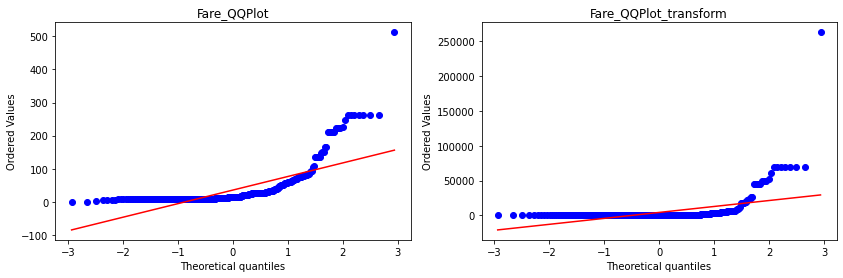

In [124]:
Transform_function(lambda x : x**2)

Accuricy Score :  0.6363530778164923


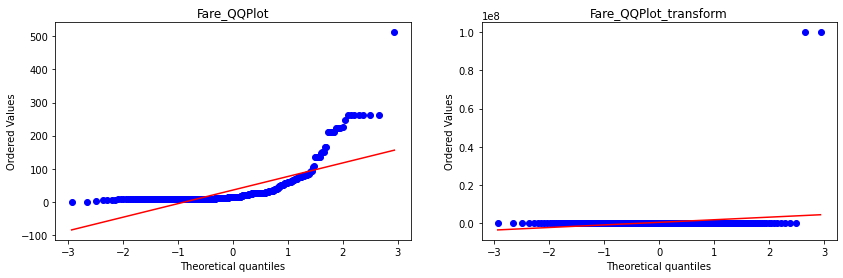

In [125]:
Transform_function(lambda x : 1/(x + 0.00000001))

Accuricy Score :  0.6339721254355399


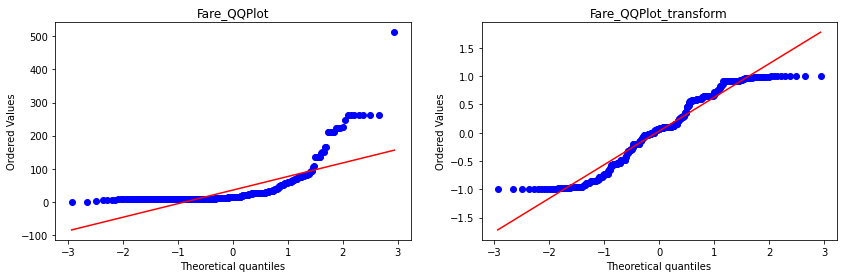

In [129]:
Transform_function(np.cos)

Accuricy Score :  0.6436120789779325


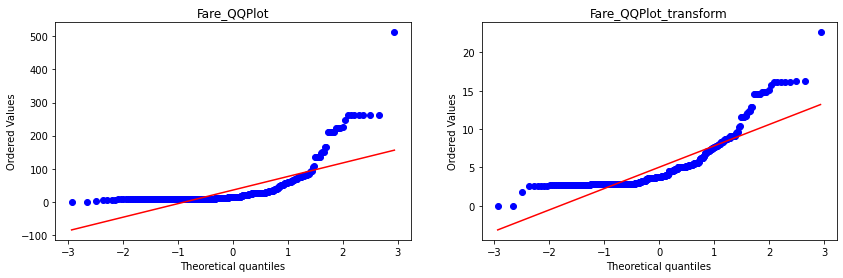

In [130]:
Transform_function(np.sqrt)

## Using Power Transformation

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [132]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [133]:
#df.to_csv("Dataset/concreat.csv")

In [134]:
df.shape

(1030, 9)

<AxesSubplot:>

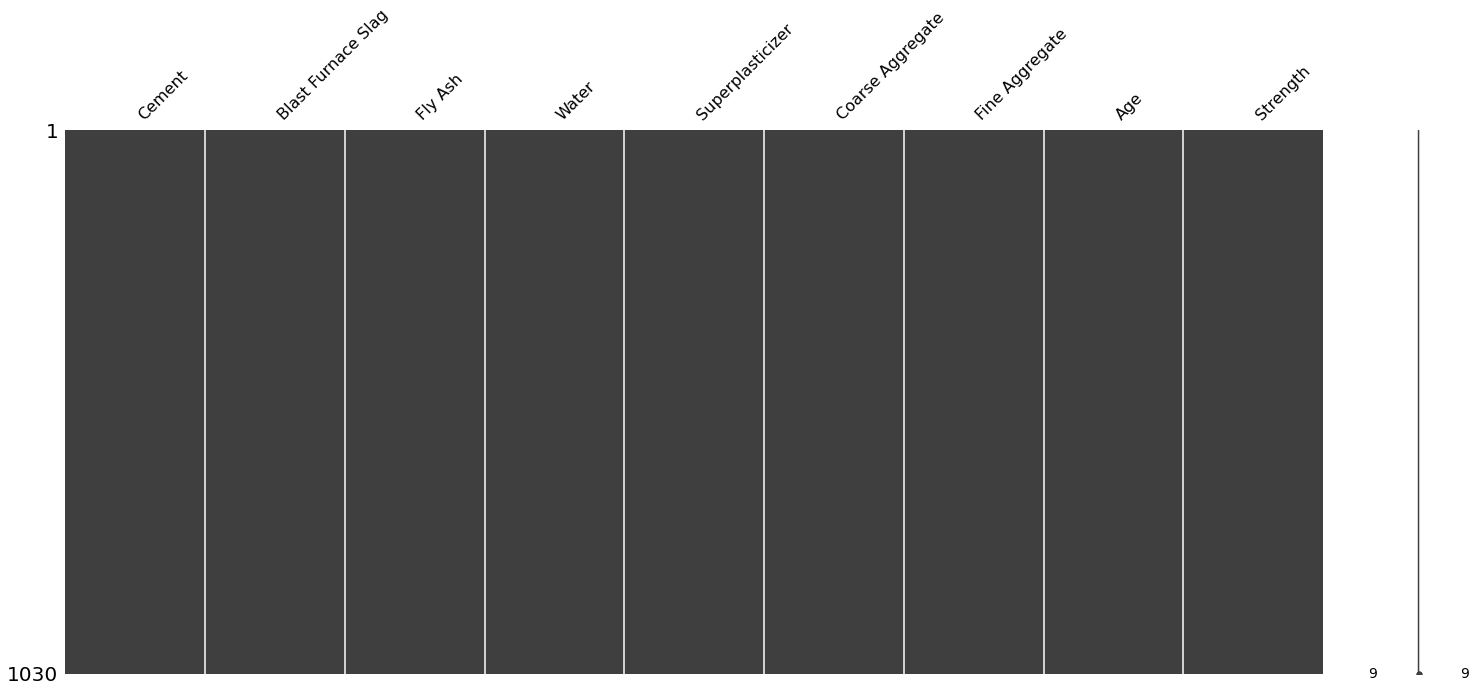

In [135]:
mis.matrix(df)

- no Null Value in our dataset

In [136]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


- Observation :
    1. No negative Value But Few Zeros in Feature like - Blast Furnace, Fly Ash, Superplasticizer

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


 - Observation :
     1. No Categorical Data.
     2. No null value
     3. Except Age every other values is Float

In [138]:
# Saperating X and y from Dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [141]:
print(X.shape,y.shape)

(1030, 8) (1030,)


In [144]:
# spliting dataset into Test and Train 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [146]:
#Appling Linear Regression Without Transformation

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_pred,y_test) # Very Bad Performance

0.42317047978909705

In [147]:
np.mean(cross_val_score(lr,X,y,cv=10,scoring="r2"))

0.27820729160873736

In [152]:
import warnings
warnings.filterwarnings(action="ignore")

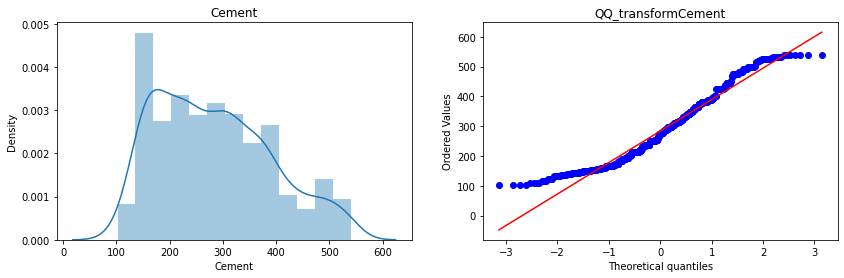

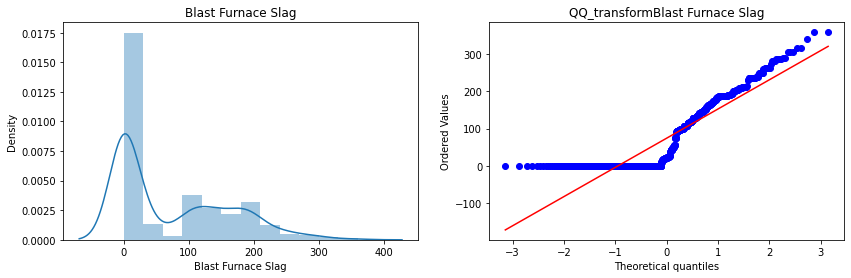

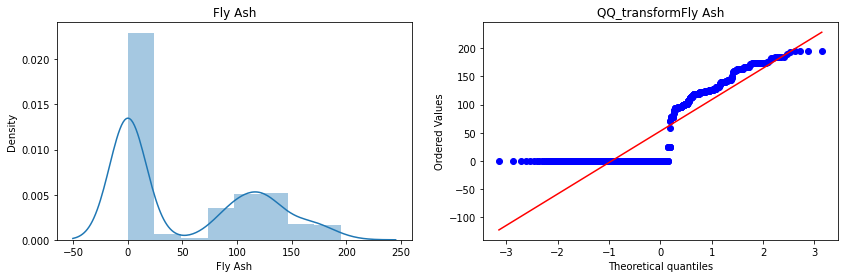

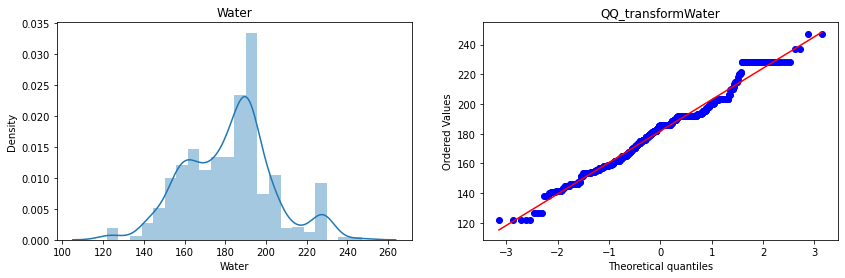

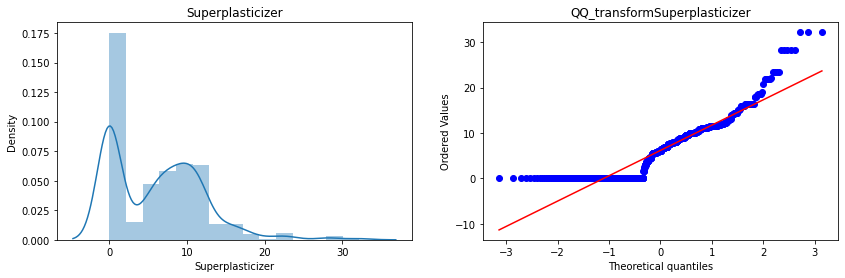

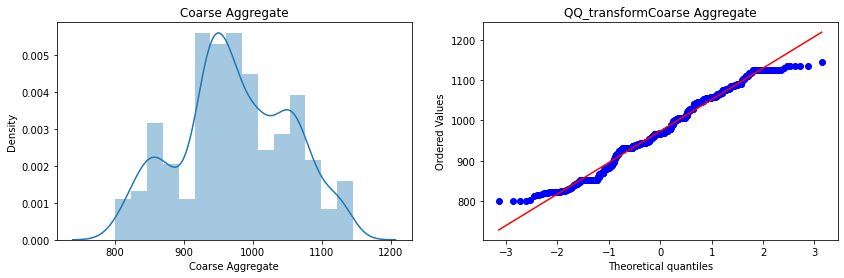

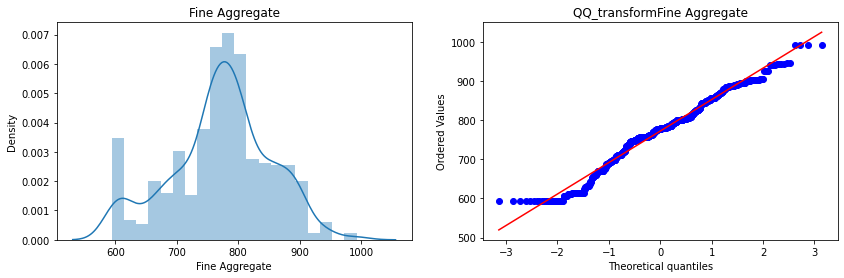

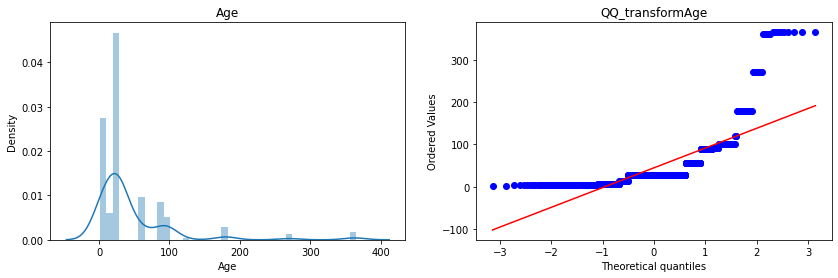

In [153]:
# Ploting Dataset Without Transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title("QQ_transform" + col)
    
    plt.show()

In [154]:
X_train.skew()

Cement                0.493343
Blast Furnace Slag    0.802065
Fly Ash               0.566038
Water                 0.091973
Superplasticizer      0.897750
Coarse Aggregate     -0.041485
Fine Aggregate       -0.239988
Age                   3.335411
dtype: float64

- Observations :
    1. Age has Maximum Right Skew data need to Transform
    2. Blast Furnace slag and Superplasticizer have Positive Skew less then Age
    3. Cement has minimum Right Skew of all
    4. Need to Apply box-cox or yeo-johnson for Transformation

In [170]:
# Appling Power Transformation
pt = PowerTransformer(method='box-cox')
X_train_transform = pt.fit_transform(X_train + 0.0000001) # FOr Zero values
X_test_transform = pt.transform(X_test + 0.0000001) # FOr Zero values

pd.DataFrame({"Features" : X_train.columns, "Box_Cox_lamdas" : pt.lambdas_})

,Features,Box_Cox_lamdas
0,Cement,0.177025
1,Blast Furnace Slag,0.022767
2,Fly Ash,-0.034635
3,Water,0.772681
4,Superplasticizer,0.087141
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [157]:
#Appling Linear Regression With Transformation

lr = LinearRegression()
lr.fit(X_train_transform,y_train)

y_pred = lr.predict(X_test_transform)

r2_score(y_pred,y_test)# Drastic Improvement in Prediction

0.7610932482737309

In [161]:
# Using Cross Val score for Prediction
pt = PowerTransformer(method='box-cox')

X_transform = pt.fit_transform(X + 0.0000001)
np.mean(cross_val_score(lr,X_transform,y,cv=10,scoring="r2"))

0.6461240350673345

In [165]:
# Converting to dataframe
X_transform_df = pd.DataFrame(X_train_transform, columns=X_train.columns)

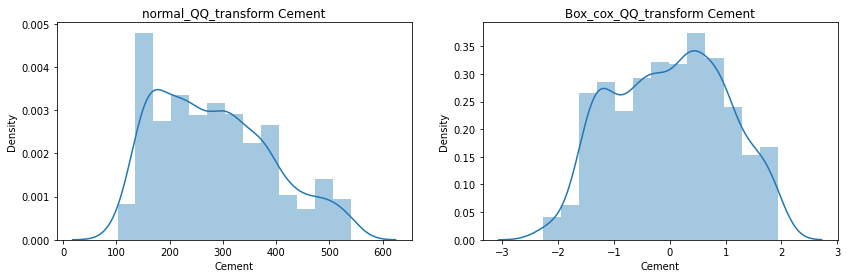

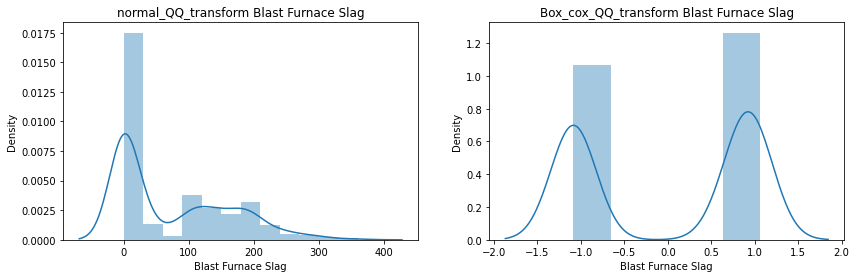

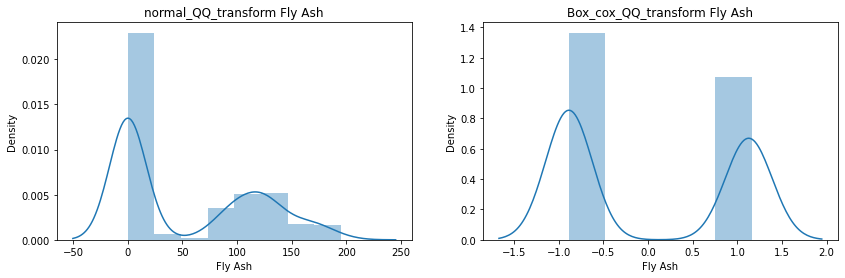

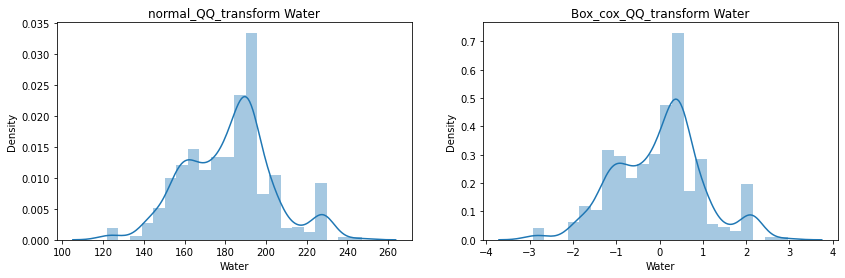

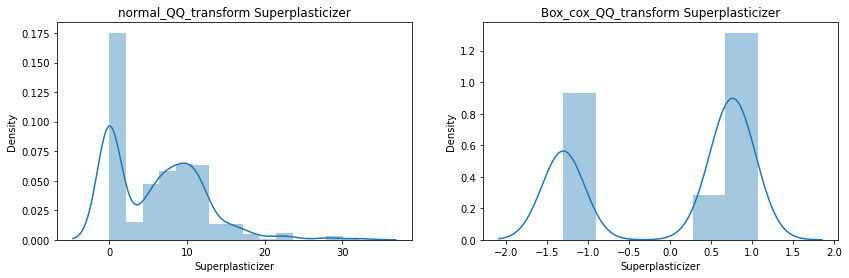

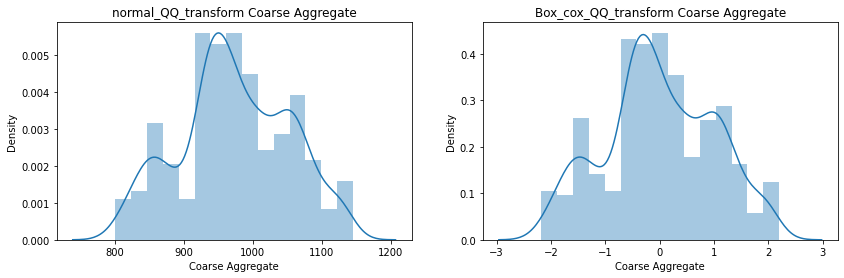

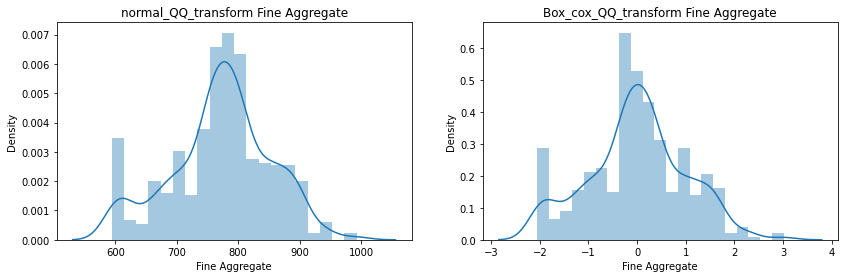

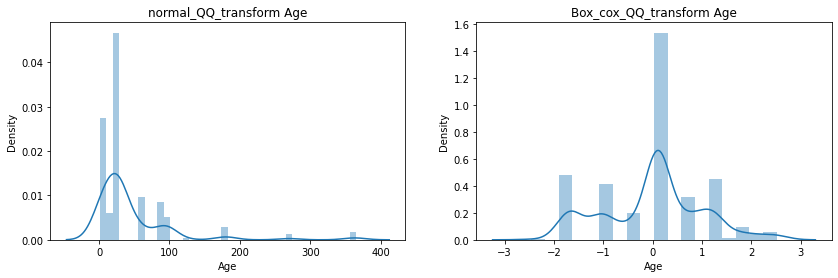

In [169]:
# Ploting Value Before and After Transformations

for col in X_transform_df.columns:
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title("normal_QQ_transform " + col)
    
    plt.subplot(122)
    sns.distplot(X_transform_df[col])
    plt.title("Box_cox_QQ_transform " + col)
    
    plt.show()

In [171]:
# Impoementing yeo-jonshon Transformation

pt1 = PowerTransformer()

X_train_yoe = pt1.fit_transform(X_train)
X_test_yoe = pt1.transform(X_test)

pd.DataFrame({"Features" : X_train.columns, "Box_Cox_lamdas" : pt.lambdas_, "Yeo_jonshon_lambdas" : pt1.lambdas_})

,Features,Box_Cox_lamdas,Yeo_jonshon_lambdas
0,Cement,0.177025,0.174348
1,Blast Furnace Slag,0.022767,0.015715
2,Fly Ash,-0.034635,-0.161447
3,Water,0.772681,0.771307
4,Superplasticizer,0.087141,0.253935
5,Coarse Aggregate,1.129813,1.130050
6,Fine Aggregate,1.782018,1.783100
7,Age,0.066631,0.019885


- Observations:
    1. Age imporvemet in Yeo-jonshon transformation